<a href="https://colab.research.google.com/github/mbgu/colabhcvdeepnn/blob/main/hcvrdeepnn24ocak21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

seed = 33
numpy.random.seed(seed)

dataset = numpy.loadtxt('/content/drive/My Drive/HCVegypt/hcvrustuyazisiz.csv', delimiter=",")

data=pd.DataFrame(dataset) #data is panda but dataset is something else
print(data.head())
# split into input (X ie dependent variables) and output (Y ie independent variables) variables
X = dataset[:,0:20]   #0-20 columns are dependent variables - remember 20th column is not included
Y = dataset[:,20]     #20 column is independent variable

scaler = StandardScaler()
X = scaler.fit_transform(X)
# create model
model = Sequential()

model.add(Dense(300, activation="relu", kernel_initializer="uniform"))
model.add(Dense(30, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform")) # 1 output neuron

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.05, epochs=30, batch_size=1, verbose=1) # 150 epoch, 10 batch size, verbose = 2

_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))


# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
print(predictions)

# Round predictions
rounded = [int(numpy.round(x, 0)) for x in predictions]
print(rounded)

print("Rounded type: ", type(rounded)) # rounded is a 'list' class
print("Shape of rounded: ", len(rounded))
print("Dataset type: ", type(dataset)) # numpy array?
print("Shape of dataset: ", dataset.shape)

# Turn rounded from a 'list' class into a numpy array
newRounded = numpy.array(rounded)
print("Rounded type: ", type(newRounded))

# Add the rounded numpy array (called newRounded) to the end of the dataset numpy array
newDataset = numpy.column_stack((dataset, newRounded))

qwerty=pd.DataFrame(newDataset)
qwerty.to_excel('hcvrprediction.xlsx',sheet_name='sheet1',index=False)

# Create a confusion matrix with the actual values and predicted probabilities
df_confusion = pd.crosstab(Y, newRounded, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_confusion)
print(df_conf_norm)

yhat=newRounded
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
cm=confusion_matrix(Y, yhat)
print(cm)

TP, FP, FN, TN = confusion_matrix(Y, yhat).ravel()

sensitivity  = TP / (TP+FN)
specificity  = TN / (TN+FP)
pos_pred_val = TP/ (TP+FP)
neg_pred_val = TN/ (TN+FN)
Accuracy=(TP+TN)/(TP+FP+TN+FN)
TPR= TP/(TP+FN)
FPR= FP/(TN+FP)
Precision= TP/(TP+FP)
F_Measure=(2*TP)/(2*TP+FP+FN)
Kappa = cohen_kappa_score(Y, yhat)


# Performance=np.array([sensitivity, specificity, pos_pred_val, neg_pred_val, Accuracy, TPR, FPR, Precision, F_Measure, Kappa])
# Labels=np.array(["sensitivity", "specificity", "pos_pred_val", "neg_pred_val", "Accuracy", "TPR", "FPR", "Precision", "F_Measure", "Kappa"])


print('sensitivity=', sensitivity)
print('specificity=', specificity)
print('pos_pred_val=', pos_pred_val)
print('neg_pred_val=', neg_pred_val)
print('Accuracy=', Accuracy)
print('TPR=',TPR)
print('FPR=', FPR)
print('Precision=', Precision)
print('F Measure=', F_Measure)
print('Kappa=', Kappa)


     0    1     2    3    4   ...         16        17        18    19   20
0  59.0  1.0  32.0  1.0  1.0  ...   660410.0  338946.0  242861.0  11.0  0.0
1  36.0  1.0  22.0  2.0  2.0  ...   137712.0   63145.0  806204.0  16.0  0.0
2  45.0  2.0  25.0  2.0  1.0  ...   936444.0       5.0       5.0   8.0  0.0
3  58.0  1.0  34.0  2.0  1.0  ...   614951.0  671490.0  135145.0  15.0  0.0
4  33.0  1.0  25.0  2.0  1.0  ...  1135200.0       5.0       5.0   4.0  0.0

[5 rows x 21 columns]
Epoch 1/30
1315/1315 [==============================] - 2s 1ms/step - loss: 0.5663 - accuracy: 0.7883 - val_loss: 1.2840 - val_accuracy: 0.0000e+00
Epoch 2/30
1315/1315 [==============================] - 2s 1ms/step - loss: 0.5220 - accuracy: 0.7813 - val_loss: 1.3157 - val_accuracy: 0.0000e+00
Epoch 3/30
1315/1315 [==============================] - 2s 1ms/step - loss: 0.5375 - accuracy: 0.7596 - val_loss: 1.5712 - val_accuracy: 0.0000e+00
Epoch 4/30
1315/1315 [==============================] - 2s 1ms/step - loss: 0

In [15]:
#Computing metrics

yhat=newRounded
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
cm=confusion_matrix(Y, yhat)
print(cm)

TP, FP, FN, TN = confusion_matrix(Y, yhat).ravel()

sensitivity  = TP / (TP+FN)
specificity  = TN / (TN+FP)
pos_pred_val = TP/ (TP+FP)
neg_pred_val = TN/ (TN+FN)
Accuracy=(TP+TN)/(TP+FP+TN+FN)
TPR= TP/(TP+FN)
FPR= FP/(TN+FP)
Precision= TP/(TP+FP)
F_Measure=(2*TP)/(2*TP+FP+FN)
Kappa = cohen_kappa_score(Y, yhat)


# Performance=np.array([sensitivity, specificity, pos_pred_val, neg_pred_val, Accuracy, TPR, FPR, Precision, F_Measure, Kappa])
# Labels=np.array(["sensitivity", "specificity", "pos_pred_val", "neg_pred_val", "Accuracy", "TPR", "FPR", "Precision", "F_Measure", "Kappa"])


print('sensitivity=', sensitivity)
print('specificity=', specificity)
print('pos_pred_val=', pos_pred_val)
print('neg_pred_val=', neg_pred_val)
print('Accuracy=', Accuracy)
print('TPR=',TPR)
print('FPR=', FPR)
print('Precision=', Precision)
print('F Measure=', F_Measure)
print('Kappa=', Kappa)




[[1011   12]
 [  52  310]]
sensitivity= 0.9510818438381938
specificity= 0.9627329192546584
pos_pred_val= 0.9882697947214076
neg_pred_val= 0.856353591160221
Accuracy= 0.9537906137184116
TPR= 0.9510818438381938
FPR= 0.037267080745341616
Precision= 0.9882697947214076
F Measure= 0.9693192713326941
Kappa= 0.8758911919710114


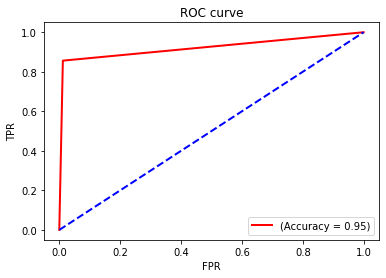

In [16]:
##Computing first ROC curve

from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds =roc_curve(Y,yhat,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='(Accuracy = %0.2f)'%Accuracy)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


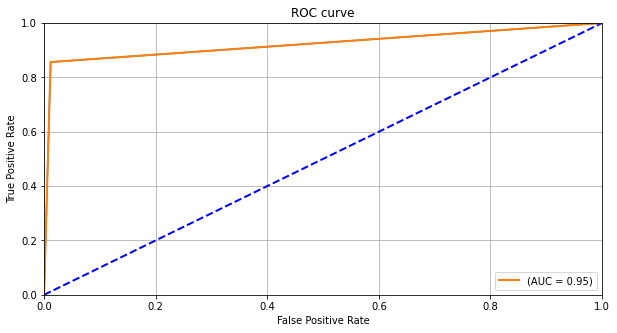

In [19]:
##Computing second ROC curve
from sklearn.metrics import roc_curve
from sklearn import metrics
FPR, TPR, thresholds = roc_curve(Y, yhat)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='(AUC = %0.2f)' % Accuracy)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc="lower right")